In [1]:
import pandas as pd
import string
import re
import datetime
import time
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
df=pd.DataFrame()
df['date_num']=list(range(19358, 19723))
df['date']=pd.date_range('2023-01-01', '2023-12-31')
df=df.set_index('date_num')
df['num_posts']=0
df['num_c_with']=0
df['num_c']=0

In [3]:
def work_with_comments(comments):
    comments['clean_text']=''
    comments['keyword_i']=0
    i=0
    for i in range (len(comments)):
        c=0
        s=comments.iloc[i]['text']
        s=str(s)
        s=s.lower()
        for p in string.punctuation:
            if p in s:
                s=s.replace(p, '')
        s=s.replace('\n', ' ')
        comments.loc[i,'clean_text']=s
        c=bool(re.search(r'санкц', s))
        comments.loc[i,'keyword_i']=comments['keyword_i'][i]+c
    return comments

In [4]:
def work_with_df(posts, comments, df):
    i=0
    for i in range(len(posts)):
        df.loc[posts['post_time'][i]//86400, 'num_posts']=df['num_posts'][posts['post_time'][i]//86400]+1
    i=0
    for i in range(len(comments)):
        df.loc[comments['comment_time'][i]//86400, 'num_c_with']=df['num_c_with'][comments['comment_time'][i]//86400]+comments['keyword_i'][i]
        df.loc[comments['comment_time'][i]//86400, 'num_c']=df['num_c'][comments['comment_time'][i]//86400]+1
    return df

# Коммерсант

In [5]:
comments=pd.read_csv('kommersant_comments_s2.csv')
posts=pd.read_csv('kommersant_posts_s2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,0,0,0
19359,2023-01-02,0,0,0
19360,2023-01-03,0,0,0
19361,2023-01-04,0,0,0
19362,2023-01-05,0,0,0
...,...,...,...,...
19718,2023-12-27,4,1,12
19719,2023-12-28,3,2,17
19720,2023-12-29,2,1,9


# Ведомости

In [6]:
comments=pd.read_csv('vedomosti_comments_s2.csv')
posts=pd.read_csv('vedomosti_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,0,1,4
19359,2023-01-02,0,0,1
19360,2023-01-03,0,0,1
19361,2023-01-04,2,1,4
19362,2023-01-05,2,1,17
...,...,...,...,...
19718,2023-12-27,5,1,12
19719,2023-12-28,5,2,19
19720,2023-12-29,2,1,9


# Эксперт

In [7]:
comments=pd.read_csv('expert_ru_comments_s2.csv')
posts=pd.read_csv('expert_ru_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,1,2,7
19359,2023-01-02,1,0,5
19360,2023-01-03,1,0,2
19361,2023-01-04,2,1,5
19362,2023-01-05,2,1,18
...,...,...,...,...
19718,2023-12-27,5,1,12
19719,2023-12-28,5,2,19
19720,2023-12-29,3,1,9


# ТАСС

In [8]:
comments=pd.read_csv('tassagency_comments_s2.csv')
posts=pd.read_csv('tassagency_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,1,2,7
19359,2023-01-02,1,0,5
19360,2023-01-03,1,0,2
19361,2023-01-04,2,1,5
19362,2023-01-05,2,1,18
...,...,...,...,...
19718,2023-12-27,5,1,12
19719,2023-12-28,5,2,19
19720,2023-12-29,3,1,9


# Московский комсомолец

In [9]:
comments=pd.read_csv('mk_ru_comments_s2.csv')
posts=pd.read_csv('mk_ru_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,8
19359,2023-01-02,5,0,36
19360,2023-01-03,3,0,9
19361,2023-01-04,5,8,69
19362,2023-01-05,3,10,41
...,...,...,...,...
19718,2023-12-27,9,2,22
19719,2023-12-28,7,3,21
19720,2023-12-29,5,2,10


# Комсомольская правда

In [10]:
comments=pd.read_csv('kpru_comments_s2.csv')
posts=pd.read_csv('kpru_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,8
19359,2023-01-02,5,0,36
19360,2023-01-03,3,0,9
19361,2023-01-04,5,8,69
19362,2023-01-05,3,10,41
...,...,...,...,...
19718,2023-12-27,10,3,42
19719,2023-12-28,7,3,21
19720,2023-12-29,5,2,10


# Аргументы и факты

In [11]:
comments=pd.read_csv('aif_ru_comments_s2.csv')
posts=pd.read_csv('aif_ru_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,8
19359,2023-01-02,5,0,36
19360,2023-01-03,3,0,9
19361,2023-01-04,5,8,69
19362,2023-01-05,3,10,41
...,...,...,...,...
19718,2023-12-27,11,4,43
19719,2023-12-28,11,8,56
19720,2023-12-29,7,2,23


# Известия

In [12]:
comments=pd.read_csv('izvestia_comments_s2.csv')
posts=pd.read_csv('izvestia_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,8
19359,2023-01-02,5,0,36
19360,2023-01-03,3,0,9
19361,2023-01-04,5,8,69
19362,2023-01-05,3,10,41
...,...,...,...,...
19718,2023-12-27,14,7,74
19719,2023-12-28,16,13,115
19720,2023-12-29,7,4,39


# Вести

In [13]:
comments=pd.read_csv('vesti_comments_s2.csv')
posts=pd.read_csv('vesti_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,8
19359,2023-01-02,5,0,36
19360,2023-01-03,3,0,9
19361,2023-01-04,5,8,69
19362,2023-01-05,3,10,41
...,...,...,...,...
19718,2023-12-27,14,7,74
19719,2023-12-28,17,13,123
19720,2023-12-29,8,5,57


# Life.ru

In [14]:
comments=pd.read_csv('life_comments_s2.csv')
posts=pd.read_csv('life_posts_s2.csv')
posts=posts[(posts['post_time']>=1672531200) & (posts['post_time']<1704067200)]
comments_res=work_with_comments(comments)
comments_res=comments_res[(comments_res['comment_time']>=1672531200) & (comments_res['comment_time']<1704067200)]
comments_res=comments_res.reset_index(drop=True)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,8
19359,2023-01-02,5,0,36
19360,2023-01-03,3,0,9
19361,2023-01-04,5,8,69
19362,2023-01-05,3,10,41
...,...,...,...,...
19718,2023-12-27,14,8,76
19719,2023-12-28,20,13,135
19720,2023-12-29,9,7,80


# Индикатор санкционной обеспокоенности

In [15]:
df['s_indicator']=df['num_c_with']/df['num_posts']
df['date_num']=df.index
df=df.set_index('date')
df['date']=df.index
df

,num_posts,num_c_with,num_c,s_indicator,date_num,date
date,,,,,,
2023-01-01,2,2,8,1.000000,19358,2023-01-01
2023-01-02,5,0,36,0.000000,19359,2023-01-02
2023-01-03,3,0,9,0.000000,19360,2023-01-03
2023-01-04,5,8,69,1.600000,19361,2023-01-04
2023-01-05,3,10,41,3.333333,19362,2023-01-05
...,...,...,...,...,...,...
2023-12-27,14,8,76,0.571429,19718,2023-12-27
2023-12-28,20,13,135,0.650000,19719,2023-12-28
2023-12-29,9,7,80,0.777778,19720,2023-12-29


In [16]:
df.to_csv('s_indicator2.csv', index=False)

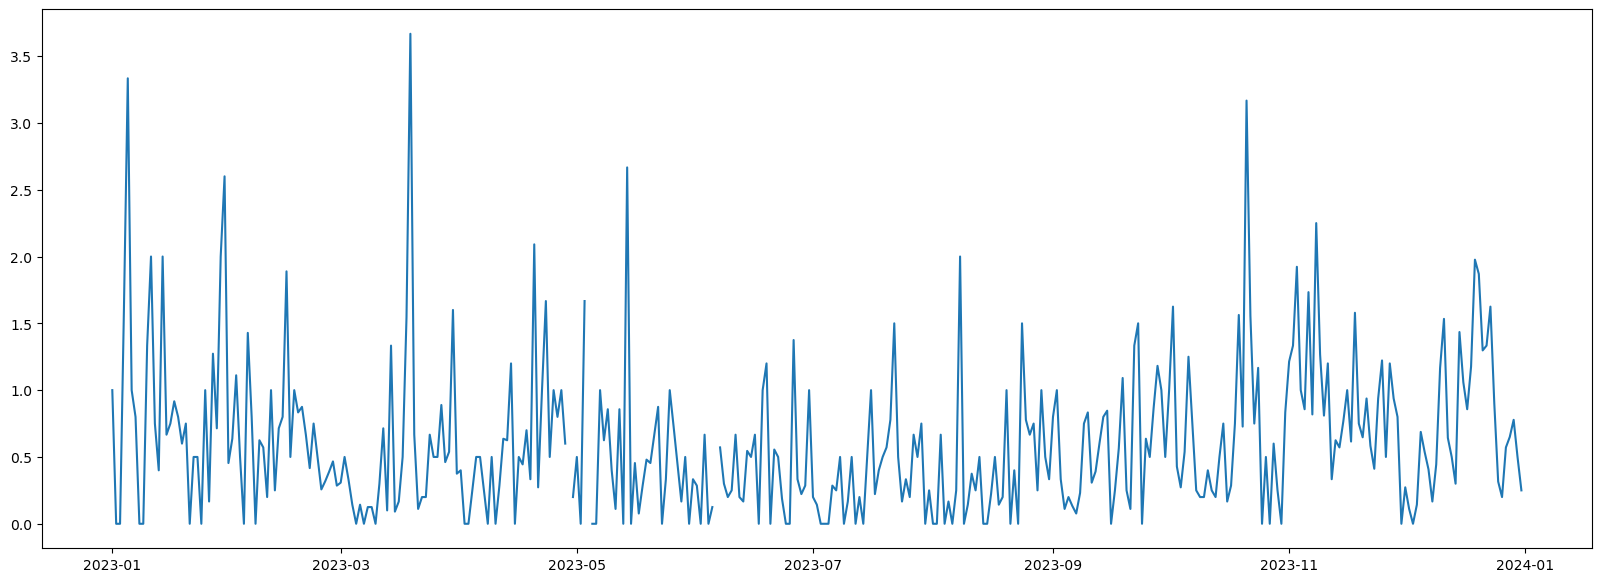

In [17]:
plt.figure(figsize=(20, 7))
plt.plot(df['s_indicator'])

# Ежемесячная частота

In [18]:
df_month=pd.DataFrame()
df_month['date']=['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12']
df_month['sum_i']=0
df_month['n']=0
df_month=df_month.set_index('date')
df_month['date']=df_month.index
df_month

,sum_i,n,date
date,,,
2023-01,0,0,2023-01
2023-02,0,0,2023-02
2023-03,0,0,2023-03
2023-04,0,0,2023-04
2023-05,0,0,2023-05
2023-06,0,0,2023-06
2023-07,0,0,2023-07
2023-08,0,0,2023-08
2023-09,0,0,2023-09


In [19]:
import math

In [20]:
i=0
for i in range (len(df)):
    if math.isnan(df['s_indicator'][i])==False and math.isinf(df['s_indicator'][i])==False:
        df_month.loc[str(df['date'][i])[:7],'sum_i']=df_month['sum_i'][str(df['date'][i])[:7]]+df['s_indicator'][i]
        df_month.loc[str(df['date'][i])[:7],'n']=df_month['n'][str(df['date'][i])[:7]]+1

In [21]:
df_month

,sum_i,n,date
date,,,
2023-01,27.908225,31,2023-01
2023-02,17.783911,28,2023-02
2023-03,16.802389,31,2023-03
2023-04,16.255159,29,2023-04
2023-05,15.482176,30,2023-05
2023-06,11.803589,29,2023-06
2023-07,11.083333,31,2023-07
2023-08,12.594048,31,2023-08
2023-09,17.199373,30,2023-09


In [22]:
df_month['s_indicator']=df_month['sum_i']/df_month['n']
df_month

,sum_i,n,date,s_indicator
date,,,,
2023-01,27.908225,31,2023-01,0.900265
2023-02,17.783911,28,2023-02,0.635140
2023-03,16.802389,31,2023-03,0.542013
2023-04,16.255159,29,2023-04,0.560523
2023-05,15.482176,30,2023-05,0.516073
2023-06,11.803589,29,2023-06,0.407020
2023-07,11.083333,31,2023-07,0.357527
2023-08,12.594048,31,2023-08,0.406260
2023-09,17.199373,30,2023-09,0.573312


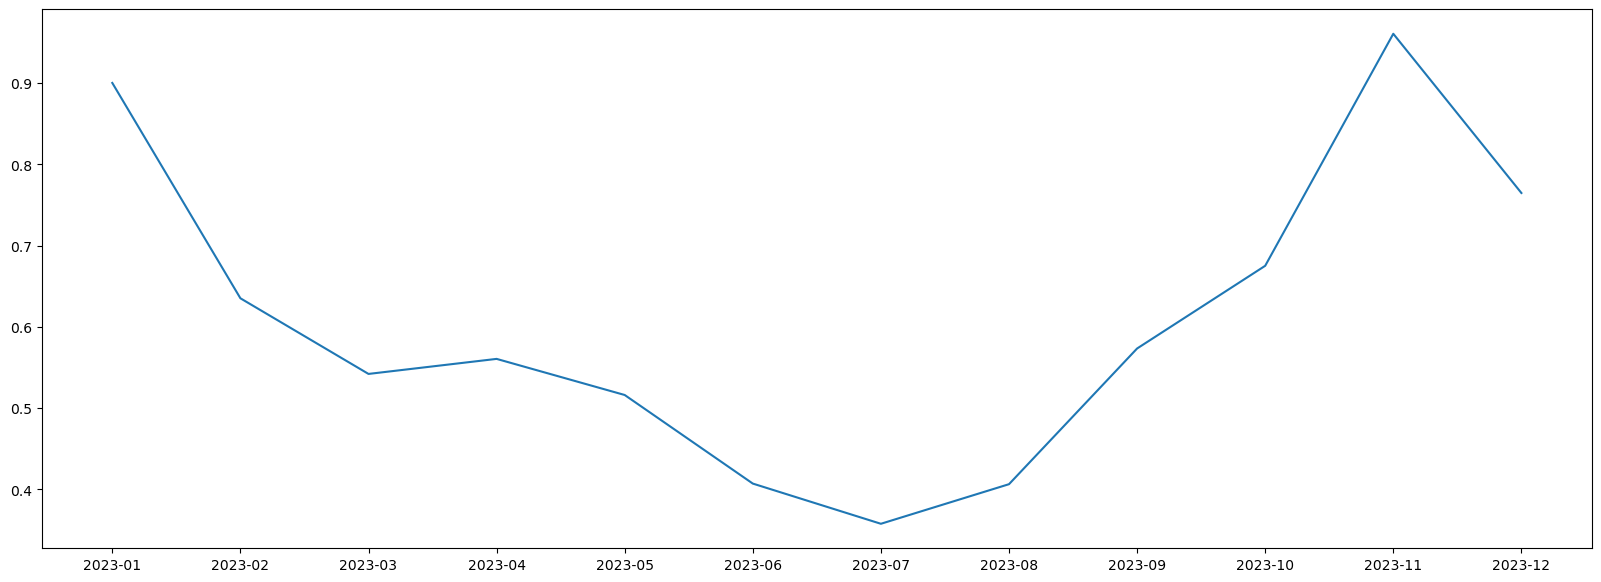

In [23]:
plt.figure(figsize=(20, 7))
plt.plot(df_month['s_indicator'])

In [24]:
df_month.to_csv('month_s_indicator2.csv', index=False)